# Plotting of the Definitions of Timing Uncertainties

In [1]:
import os,sys
import numpy as np
import scipy.stats 

In [2]:
%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt
plt.rcParams["figure.dpi"] = 300

### Error definitions according to wikipedia

* __Accuracy__ is the proximity of measurement results to the true (reference) value.
* __Precision__ is the degree to which repeated (or reproducible) measurements under unchanged conditions show the same results.

In [3]:
#https://stackoverflow.com/questions/33737736/matplotlib-axis-arrow-tip
def arrowed_spines(fig, ax):

    xmin, xmax = ax.get_xlim() 
    ymin, ymax = ax.get_ylim()

    # removing the default axis on all sides:
    for side in ['bottom','right','top','left']:
        ax.spines[side].set_visible(False)

    # removing the axis ticks
    plt.xticks([]) # labels 
    plt.yticks([])
    ax.xaxis.set_ticks_position('none') # tick markers
    ax.yaxis.set_ticks_position('none')

    # get width and height of axes object to compute 
    # matching arrowhead length and width
    dps = fig.dpi_scale_trans.inverted()
    bbox = ax.get_window_extent().transformed(dps)
    width, height = bbox.width, bbox.height

    # manual arrowhead width and length
    hw = 1./20.*(ymax-ymin) 
    hl = 1./20.*(xmax-xmin)
    lw = 1. # axis line width
    ohg = 0.3 # arrow overhang

    # compute matching arrowhead length and width
    yhw = hw/(ymax-ymin)*(xmax-xmin)* height/width 
    yhl = hl/(xmax-xmin)*(ymax-ymin)* width/height

    # draw x and y axis
    ax.arrow(xmin, 0, xmax-xmin, 0., fc='k', ec='k', lw = lw, 
             head_width=hw, head_length=hl, overhang = ohg, 
             length_includes_head= True, clip_on = False) 

    ax.arrow(0, ymin, 0., ymax-ymin, fc='k', ec='k', lw = 3*lw, 
             head_width=yhw, head_length=yhl, overhang = ohg, 
             length_includes_head= True, clip_on = False)


### Plot the skew measurements of a slave clock

Text(47,-0.00664904,'mean')

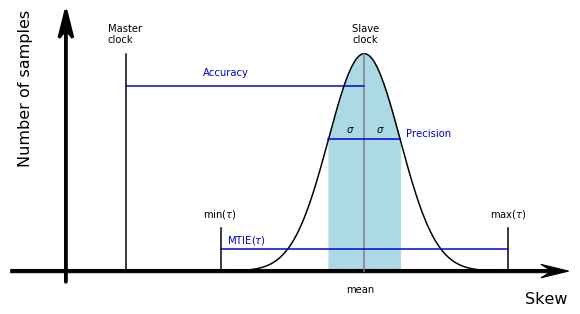

In [4]:
x_min = -5
x_max = 80.0

plt.figure(figsize=(10,5),frameon=False)

mean = 50.0 
std = 6.0

x = np.linspace(x_min, x_max, 1000)
y = scipy.stats.norm.pdf(x,mean,std)

pt0 = mean
ymax = scipy.stats.norm.pdf(pt0 ,mean, std)

plt.plot(x,y, color='black')
fig = plt.gcf()

plt.ylim(top=1.2*ymax)
ax = plt.gca()
arrowed_spines(fig, ax)

# label axes
plt.text(x_max-3,-0.01, 'Skew ', fontsize=16)
plt.text(x_min-3, 1.15*ymax, 'Number of samples', fontsize=16, rotation='vertical')

# draw mean
plt.plot([pt0,pt0],[0.0,ymax], color='grey')
plt.text(pt0-2,1.05*ymax,'Slave \nclock')

# draw reference value
pt00 = 10
plt.plot([pt00,pt00],[0.0,ymax], color='black')
plt.text(pt00-3,1.05*ymax,'Master \nclock')

# draw rms on mean
pt1 = mean + std
pt2 = mean - std

ptx = np.linspace(pt1, pt2, 10)
pty = scipy.stats.norm.pdf(ptx,mean,std)

#plt.fill_between(ptx, pty, alpha='0.3')
plt.fill_between(ptx, pty, color='lightblue')

# draw min/max values
ptmax = mean + 4*std
ptmin = mean - 4*std

plt.plot([ptmax,ptmax],[0.0,0.2*ymax], color='black')
plt.text(ptmax-3,0.25*ymax,r'max($\tau$)')
plt.plot([ptmin,ptmin],[0.0,0.2*ymax], color='black')
plt.text(ptmin-3,0.25*ymax,r'min($\tau$)')

# annotate definitions
plt.plot([pt00,pt0],[0.85*ymax,0.85*ymax], color='mediumblue') 
plt.text(pt00+13,0.9*ymax,'Accuracy', color='mediumblue')

ptsigma = pty[0]
plt.plot([pt1,pt2],[ptsigma,ptsigma], color='mediumblue')
plt.text(pt0+7,0.62*ymax,'Precision', color='mediumblue')

plt.plot([ptmin,ptmax],[0.1*ymax,0.1*ymax], color='mediumblue') 
plt.text(pt0-23,0.13*ymax,r'MTIE($\tau$)', color='mediumblue')

ptsigma = pty[0]
plt.text(pt0+2,1.05*ptsigma,r'$\sigma$')
plt.text(pt0-3,1.05*ptsigma,r'$\sigma$')
plt.text(pt0-3,-0.1*ymax,'mean')

#plt.savefig('../../AccuracyAndPrecision.eps', transparent=False)

### Definitions borrowed from the WR Torture Report

* The mean of the measured PPS skew value between the Master Clock and the Slave Clock is interpreted as __accuracy__. 
* The standard deviation of the mesurement ($\sigma$) is interpreted as __precision__, meaning that 64.2% of the data samples fall into the range of $mean \pm \sigma$. 
* The (PPS) skew, in the literature, is also called __Time Error (TE)__.
* The __Time Interval Error (TIE)__ is defined as the phase difference between the signal being measured and the reference clock and is conventionally set to zero at the start of the total measurement period $	au$. Therefore TIE gives the phase change since the measurement began. 
* The __Maximum Time Interval Error (MTIE)__ is the maximum peak-to-peak variation (or jitter) of the clock synchronization during the "observation" time window $\tau$. MTIE is a measure of wander that characterizes frequency offsets and phase transients.

### Plot the skew measurement of several slave clocks

Text(65.6667,0.0698149,'Mean \n(slaves)')

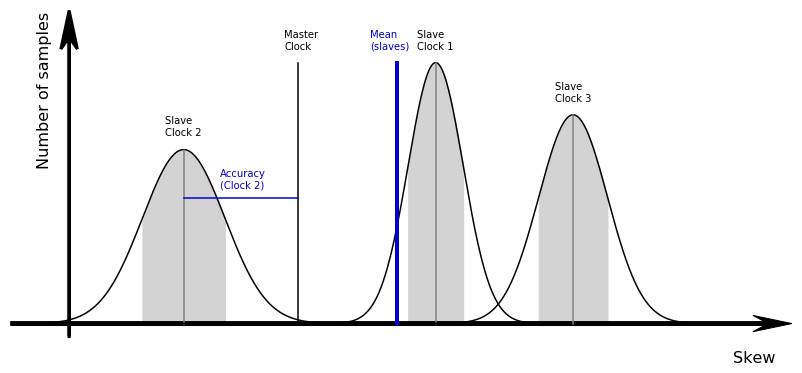

In [5]:
x_min = -5
x_max = 150.0

plt.figure(figsize=(14,6),frameon=False)

mean = 80.0 
std = 6.0

x = np.linspace(x_min, x_max, 1000)
y = scipy.stats.norm.pdf(x,mean,std)

pt0 = mean
ymax = scipy.stats.norm.pdf(pt0 ,mean, std)

plt.plot(x,y, color='black')

fig = plt.gcf()
plt.ylim(top=1.2*ymax)
ax = plt.gca()
arrowed_spines(fig, ax)

# label axes
plt.text(x_max-5,-0.01, 'Skew ', fontsize=16)
plt.text(x_min-2,1.15*ymax, 'Number of samples', fontsize=16, rotation='vertical')

# draw mean
plt.plot([pt0,pt0],[0.0,ymax], color='grey')
plt.text(pt0-4,1.05*ymax,'Slave \nClock 1')

# draw reference value
pt00 = 50
plt.plot([pt00,pt00],[0.0,ymax], color='black')
plt.text(pt00-3,1.05*ymax,'Master \nClock')

# draw rms on mean
pt1 = mean + std
pt2 = mean - std

ptx = np.linspace(pt1, pt2, 10)
pty = scipy.stats.norm.pdf(ptx,mean,std)

#plt.fill_between(ptx, pty, alpha='0.3', color='grey')
plt.fill_between(ptx, pty, color='lightgrey')

# ------------------------------------------------------------------------------------------------------
# add a second slave to the plot
mean2 = 25.0 
std2 = 9.0

x2 = np.linspace(x_min, x_max, 1000)
y2 = scipy.stats.norm.pdf(x2,mean2,std2)
ymax2 = scipy.stats.norm.pdf(mean2 ,mean2, std2)

plt.plot(x2,y2, color='black')

# draw mean
plt.plot([mean2,mean2],[0.0,ymax2], color='grey')
plt.text(mean2-4,0.72*ymax,'Slave \nClock 2')

# draw rms on mean
pt12 = mean2 + std2
pt22 = mean2 - std2

ptx2 = np.linspace(pt12, pt22, 10)
pty2 = scipy.stats.norm.pdf(ptx2,mean2,std2)

#plt.fill_between(ptx2, pty2, alpha='0.3', color='grey')
plt.fill_between(ptx2, pty2, color='lightgrey')

# annotate definitions
plt.plot([pt00,mean2],[0.48*ymax,0.48*ymax], color='mediumblue') 
plt.text(mean2+8,0.52*ymax,'Accuracy\n(Clock 2)', color='mediumblue')

# ------------------------------------------------------------------------------------------------------
# add a third slave to the plot
mean3 = 110.0 
std3 = 7.5

x3 = np.linspace(x_min, x_max, 1000)
y3 = scipy.stats.norm.pdf(x3,mean3,std3)
ymax3 = scipy.stats.norm.pdf(mean3 ,mean3, std3)

plt.plot(x3,y3, color='black')

# draw mean
plt.plot([mean3,mean3],[0.0,ymax3], color='grey')
plt.text(mean3-4,0.85*ymax,'Slave \nClock 3')

# draw rms on mean
pt13 = mean3 + std3
pt23 = mean3 - std3

ptx3 = np.linspace(pt13, pt23, 10)
pty3 = scipy.stats.norm.pdf(ptx3,mean3,std3)

#plt.fill_between(ptx3, pty3, alpha='0.3', color='grey')
plt.fill_between(ptx3, pty3, color='lightgrey')

# try to get the rms accuracy defined
acc = np.array([mean,mean2,mean3])
amean = np.mean(acc)
astd = np.std(acc)

plt.plot([amean,amean],[0.0,ymax], color='mediumblue',lw=4)
plt.text(amean-6,1.05*ymax,'Mean \n(slaves)', color='mediumblue')


#plt.savefig('../../MeanAccuracy.eps', transparent=False)